In [1]:
import pandas as pd

# resale_flat_prices_1900_1999 = pd.read_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/resale_flat_prices_1990_1999.csv')
# resale_flat_prices_2000_2012 = pd.read_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/resale_flat_prices_2000_feb_2012.csv')
# resale_flat_prices_2012_2014 = pd.read_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/resale_flat_prices_mar_2012_dec_2014.csv')
# resale_flat_prices_2015_2016 = pd.read_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/resale_flat_prices_jan_2015_dec_2016.csv')
# resale_flat_prices_from_2017 = pd.read_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/resale_flat_prices_jan_2017_onwards.csv')


resale_flat_prices_1900_1999 = pd.read_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/resale_flat_prices_1990_1999.csv')
resale_flat_prices_2000_2012 = pd.read_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/resale_flat_prices_2000_feb_2012.csv')
resale_flat_prices_2012_2014 = pd.read_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/resale_flat_prices_mar_2012_dec_2014.csv')
resale_flat_prices_2015_2016 = pd.read_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/resale_flat_prices_jan_2015_dec_2016.csv')
resale_flat_prices_from_2017 = pd.read_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/resale_flat_prices_jan_2017_onwards.csv')

frames = [resale_flat_prices_1900_1999, resale_flat_prices_2000_2012, resale_flat_prices_2012_2014, resale_flat_prices_2015_2016, resale_flat_prices_from_2017]

combined_data = pd.concat(frames)

print(combined_data)

# file_path = '/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/combined_data.csv'
file_path = '/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/combined_data.csv'


combined_data.to_csv(file_path, index = False)

          month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
199204  2025-01      YISHUN  EXECUTIVE   344     YISHUN AVE 11     01 TO 03   
199205  2025-01      YISHUN  EXECUTIVE   352    YISHUN RING RD     04 TO 06   
199206  2025-01      YISHUN  EXECUTIVE   360    YISHUN RING RD     07 TO 09   
199207  2025-01      YISHUN  EXECUTIVE   614      YISHUN ST 61     04 TO 06   
199208  2025-01      YISHUN  EXECUTIVE   836      YISHUN ST 81     01 TO 03   

        floor_area_sqm      flat_model  lease_comme

# Feature engineering: normalising, converting into the years and months into decimal place

1. new_remaining_lease

In [2]:
#convert to date objects
combined_data['month']=pd.to_datetime(combined_data['month'].astype(str)+'-01', errors='coerce')
combined_data['lease_commence_date']=pd.to_datetime(combined_data['lease_commence_date'].astype(str) +'-01-01', errors='coerce')

#remove UTC timezones
combined_data['lease_commence_date']= combined_data['lease_commence_date'].dt.tz_localize(None)
combined_data['month']= combined_data['month'].dt.tz_localize(None)

#extract years and months from the dates
combined_data['years_difference'] = combined_data['month'].dt.year - combined_data['lease_commence_date'].dt.year
combined_data['months_difference'] = combined_data['month'].dt.month - combined_data['lease_commence_date'].dt.month

#accounts for negative months (end date month is earlier than start date month e.g jan 2024 and dec 2023)
combined_data['years_difference'] = combined_data['years_difference'] - (combined_data['months_difference'] < 0).astype(int)  #this gives 1. 

combined_data['months_difference'] = combined_data['months_difference'].mask(
    combined_data['months_difference'] < 0,
    combined_data['months_difference'] + 12
)

#combined_data['months_difference'] = (combined_data['months_difference'] + 12) % 12 (Alternative way, add 12)

#accounts for month counts > 12
combined_data['new_remaining_lease'] = 99 - (combined_data['years_difference'] + (combined_data['months_difference'] / 12)).astype(float)

print(combined_data['new_remaining_lease'])


#Feature Engineering; Extracting month and year of sale
combined_data['month_of_sale'] = combined_data['month'].dt.month
combined_data['year_of_sale'] = combined_data['month'].dt.year

#Convert block to string
combined_data['block'] = combined_data['block'].astype(str)

print(combined_data.dtypes)

combined_data.to_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/combined_data_2.csv', float_format="%.2f", index = False)

0         86.0
1         86.0
2         86.0
3         86.0
4         85.0
          ... 
199204    62.0
199205    62.0
199206    62.0
199207    61.0
199208    62.0
Name: new_remaining_lease, Length: 945412, dtype: float64
month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date    datetime64[ns]
resale_price                  float64
remaining_lease                object
years_difference                int64
months_difference               int32
new_remaining_lease           float64
month_of_sale                   int32
year_of_sale                    int32
dtype: object


Cleaning the street names + Binning street names into different locations

In [3]:
print(combined_data['street_name'].unique()) 

['ANG MO KIO AVE 1' 'ANG MO KIO AVE 3' 'ANG MO KIO AVE 4'
 'ANG MO KIO AVE 10' 'ANG MO KIO AVE 5' 'ANG MO KIO AVE 8'
 'ANG MO KIO AVE 6' 'ANG MO KIO AVE 9' 'ANG MO KIO AVE 2'
 'BEDOK RESERVOIR RD' 'BEDOK NTH ST 3' 'BEDOK STH RD' 'NEW UPP CHANGI RD'
 'BEDOK NTH RD' 'BEDOK STH AVE 1' 'CHAI CHEE RD' 'CHAI CHEE DR'
 'BEDOK NTH AVE 4' 'BEDOK STH AVE 3' 'BEDOK STH AVE 2' 'BEDOK NTH ST 2'
 'BEDOK NTH ST 4' 'BEDOK NTH AVE 2' 'BEDOK NTH AVE 3' 'BEDOK NTH AVE 1'
 'BEDOK NTH ST 1' 'CHAI CHEE ST' 'SIN MING RD' 'SHUNFU RD'
 'BT BATOK ST 11' 'BT BATOK WEST AVE 8' 'BT BATOK WEST AVE 6'
 'BT BATOK ST 21' 'BT BATOK EAST AVE 5' 'BT BATOK EAST AVE 4'
 'HILLVIEW AVE' 'BT BATOK CTRL' 'BT BATOK ST 31' 'BT BATOK EAST AVE 3'
 'TAMAN HO SWEE' 'TELOK BLANGAH CRES' 'BEO CRES' 'TELOK BLANGAH DR'
 'DEPOT RD' 'TELOK BLANGAH RISE' 'JLN BT MERAH' 'HENDERSON RD' 'INDUS RD'
 'BT MERAH VIEW' 'HENDERSON CRES' 'BT PURMEI RD' 'TELOK BLANGAH HTS'
 'EVERTON PK' 'KG BAHRU HILL' 'REDHILL CL' 'HOY FATT RD' 'HAVELOCK RD'
 'JLN K

In [4]:
#cleaning the street name; transforming into generic street names
combined_data['clean_street_name'] = combined_data['street_name'].str.replace(r'\s+(AVE|ST|RD|DR|CRES|CTRL|LANE|CL|PL|BLK|PK|WAY|VIEW|LOOP|CLOSE|HTS|TERRACE|WALK|LINK|GREEN|NTH|STH|CTRL|CIR|LANE|CTRL|PKT|MKT|CTR|EXT)\b(\s\d+)?', '', regex=True)
combined_data['clean_street_name'] = combined_data['clean_street_name'].str.replace(r'^LOR \d+[A-Z]?\s+TOA PAYOH', 'TOA PAYOH', regex=True)


print(combined_data['clean_street_name'].unique())

#creating new columns for binning 

region_map = {
   # Central
    "ANG MO KIO": "Central", "BT MERAH": "Central", "TANGLIN HALT": "Central", "DOVER": "Central",
    "GHIM MOH": "Central", "STIRLING": "Central", "MEI LING": "Central", "HOLLAND": "Central",
    "DAWSON": "Central", "QUEEN'S": "Central", "KIM TIAN": "Central", "KIM CHENG": "Central",
    "MOH GUAN TER": "Central", "KRETA AYER": "Central", "TIONG BAHRU": "Central", "SAGO": "Central",
    "OUTRAM": "Central", "OUTRAM HILL": "Central", "CHIN SWEE": "Central", "SPOTTISWOODE": "Central",
    "EVERTON": "Central", "REDHILL": "Central", "HOY FATT": "Central", "HENDERSON": "Central",
    "INDUS": "Central", "BEO": "Central", "DEPOT": "Central", "TELOK BLANGAH": "Central",
    "TELOK BLANGAH RISE": "Central", "JLN BT MERAH": "Central", "JLN BT HO SWEE": "Central",
    "JLN RUMAH TINGGI": "Central", "JLN KUKOH": "Central", "KAMPONG BAHRU HILL": "Central",
    "SENG POH": "Central", "ZION": "Central", "JLN MEMBINA": "Central", "JLN MEMBINA BARAT": "Central",
    "LOWER DELTA": "Central", "TOWNER": "Central", "JLN BAHAGIA": "Central", "MCNAIR": "Central",
    "KENT": "Central", "AH HOOD": "Central", "DORSET": "Central", "OWEN": "Central",
    "KING GEORGE'S": "Central", "CRAWFORD": "Central", "SELEGIE": "Central", "SHORT": "Central",
    "UPP CROSS": "Central", "WATERLOO": "Central", "BUFFALO": "Central", "ROWELL": "Central",
    "ROCHOR": "Central", "BAIN": "Central", "SMITH": "Central", "VEERASAMY": "Central",
    "CAMBRIDGE": "Central", "BENDEMEER": "Central", "UPP BOON KENG": "Central", "WHAMPOA": "Central",
    "WHAMPOA WEST": "Central", "LOR LIMAU": "Central", "KALLANG BAHRU": "Central",
    "GEYLANG BAHRU": "Central", "JLN RAJAH": "Central", "MOULMEIN": "Central", "FARRER": "Central",
    "MARINE": "Central", "MARINE TER": "Central", "QUEEN": "Central", "JLN DUSUN": "Central",
    "JLN MA'MOR": "Central", "PAYA LEBAR": "Central", 'SIN MING': 'Central','SHUNFU': 'Central','TAMAN HO SWEE': 'Central',
    'BT PURMEI': 'Central','KG BAHRU HILL': 'Central','HAVELOCK': 'Central',
    'JLN KLINIK': 'Central',
    'EMPRESS': 'Central',
    "C'WEALTH WEST": 'Central',
    'JLN BATU': 'Central',
    "ST. GEORGE'S": 'Central',
    'NTH BRIDGE': 'Central',
    'FRENCH': 'Central',
    'BEACH': 'Central',
    'KG ARANG': 'Central',
    "C'WEALTH": 'Central',
    'MARGARET': 'Central',
    'DOVER EAST': 'West',
    'TAMPINES': 'East',
    'TOA PAYOH': 'Central',
    'TOA PAYOH EAST': 'Central',
    'POTONG PASIR': 'Central',
    'UPP ALJUNIED': 'Central',
    'JOO SENG': 'Central',
    'LENGKOK BAHRU': 'Central',
    'NEW': 'Central',
    'TG PAGAR PLAZA': 'Central',
    'KELANTAN': 'Central',
    'GLOUCESTER': 'Central',
    'BOON KENG': 'Central',
    'KIM KEAT': 'Central',
    'SILAT': 'Central',
    'NILE': 'Central',
    'JLN BERSEH': 'Central',
    'CHANDER': 'Central',
    'ALEXANDRA': 'Central','LIM LIAK': 'Central',
    'JLN TENTERAM': 'Central',
    'PIPIT': 'Central',
    'KIM PONG': 'Central',
    'RACE COURSE': 'Central',
    'TESSENSOHN': 'Central', 'CLARENCE': 'Central','STRATHMORE': 'Central',  'BOON TIONG': 'Central','CANTONMENT': 'Central', 'KLANG': 'Central',
    'JELLICOE': 'Central',

    # East
    "BEDOK": "East", "BEDOK RESERVOIR": "East", "CHAI CHEE": "East", "NEW UPP CHANGI": "East",
    "CIRCUIT": "East", "MACPHERSON": "East", "JLN PASAR BARU": "East", "GEYLANG SERAI": "East",
    "EUNOS": "East", "SIMS": "East", "ALJUNIED": "East", "GEYLANG EAST": "East", "DAKOTA": "East",
    "PINE": "East", "HAIG": "East", "BALAM": "East", "JLN DUA": "East", "UBI": "East",
    "CASSIA": "East", "OLD AIRPORT": "East", "JOO CHIAT": "East", "EAST COAST": "East",
    "MARINE PARADE": "East",'SIMEI': 'East','PASIR RIS': 'East','LOR 3 GEYLANG': 'East', 'LENGKONG TIGA': 'East',   'JLN TENAGA': 'East',
    'ELIAS': 'East', 'JLN DAMAI': 'East','CHANGI VILLAGE': 'East','JLN TIGA': 'East', 

    # North
    "WOODLANDS": "North", "WOODLANDS RING": "North", "WOODLANDS CIRCLE": "North",
    "WOODLANDS RISE": "North", "MARSILING": "North", "MARSILING RISE": "North", "ADMIRALTY": "North",
    "CANBERRA": "North", "SEMBAWANG": "North", "SEMBAWANG VISTA": "North",
    "WELLINGTON CIRCLE": "North", "MONTREAL": "North", "LIM CHU KANG": "North",

    # North-East
    "HOUGANG": "North-East", "LOR AH SOO": "North-East", "SERANGOON": "North-East",
    "LOR LEW LIAN": "North-East", "UPP SERANGOON": "North-East", "YISHUN": "North-East",
    "YISHUN RING": "North-East", "PUNGGOL": "North-East", "PUNGGOL EAST": "North-East",
    "PUNGGOL FIELD": "North-East", "EDGEDALE PLAINS": "North-East", "COMPASSVALE": "North-East",
    "COMPASSVALE BOW": "North-East", "ANCHORVALE": "North-East", "FERNVALE": "North-East",
    "SENGKANG": "North-East", "SENGKANG EAST": "North-East", "SENGKANG WEST": "North-East",
    "SUMANG": "North-East", "JLN KAYU": "North-East", "BUANGKOK": "North-East",
    "BUANGKOK FARMWAY 1": "North-East", "SELETAR WEST FARMWAY 6": "North-East",
    "ALKAFF": "North-East", "BIDADARI": "North-East", "BISHAN": "North-East", "BRIGHT HILL": "North-East", 'KG KAYU': 'North-East','RIVERVALE': 'North-East', 'EDGEFIELD PLAINS': 'North-East',

    # West
    "BT BATOK": "West", "BT BATOK WEST": "West", "BT BATOK EAST": "West", "HILLVIEW": "West",
    "BT PANJANG RING": "West", "BANGKIT": "West", "FAJAR": "West", "PENDING": "West",
    "PETIR": "West", "CASHEW": "West", "CHOA CHU KANG": "West", "KEAT HONG": "West",
    "JELAPANG": "West", "JELEBU": "West", "GANGSA": "West", "JLN TECK WHYE": "West",
    "TECK WHYE": "West", "TOH YI": "West", "CLEMENTI": "West", "WEST COAST": "West",
    "CLEMENTI WEST": "West", "JURONG EAST": "West", "TOH GUAN": "West", "JURONG WEST": "West",
    "PANDAN GDNS": "West", "TEBAN GDNS": "West", "BOON LAY": "West", "YUNG KUANG": "West",
    "YUNG PING": "West", "YUNG LOH": "West", "YUNG AN": "West", "YUNG HO": "West",
    "YUNG SHENG": "West", "HO CHING": "West", "HU CHING": "West", "CORPORATION": "West",
    "KANG CHING": "West", "TAH CHING": "West", "TAO CHING": "West", "YUAN CHING": "West",
    "DELTA": "West", "QUEENSWAY": "West", 'SAUJANA': 'West',  'LOMPANG': 'West',  'SENJA': 'West', 'SEGAR': 'West',
}

#map the strings and convert to upper case
combined_data['region']  = combined_data['clean_street_name'].map(region_map).str.upper()


combined_data.to_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/combined_data_2.csv', float_format="%.2f", index = False)

#check if there are unmapped regions in clean_street_names
unmapped_streets = combined_data.loc[combined_data['region'].isna(), 'clean_street_name'].unique()
print(unmapped_streets)

['ANG MO KIO' 'BEDOK RESERVOIR' 'BEDOK' 'NEW UPP CHANGI' 'CHAI CHEE'
 'SIN MING' 'SHUNFU' 'BT BATOK' 'BT BATOK WEST' 'BT BATOK EAST' 'HILLVIEW'
 'TAMAN HO SWEE' 'TELOK BLANGAH' 'BEO' 'DEPOT' 'TELOK BLANGAH RISE'
 'JLN BT MERAH' 'HENDERSON' 'INDUS' 'BT MERAH' 'BT PURMEI' 'EVERTON'
 'KG BAHRU HILL' 'REDHILL' 'HOY FATT' 'HAVELOCK' 'JLN KLINIK'
 'JLN RUMAH TINGGI' 'JLN BT HO SWEE' 'KIM CHENG' 'MOH GUAN TER' 'KIM TIAN'
 'EMPRESS' "QUEEN'S" 'FARRER' 'JLN KUKOH' 'OUTRAM' 'SHORT' 'SELEGIE'
 'UPP CROSS' 'WATERLOO' 'QUEEN' 'BUFFALO' 'ROWELL' 'ROCHOR' 'BAIN' 'SMITH'
 'VEERASAMY' 'TECK WHYE' 'CLEMENTI' 'WEST COAST' 'CLEMENTI WEST'
 "C'WEALTH WEST" 'CIRCUIT' 'MACPHERSON' 'JLN PASAR BARU' 'GEYLANG SERAI'
 'EUNOS' 'SIMS' 'ALJUNIED' 'GEYLANG EAST' 'DAKOTA' 'PINE' 'HAIG' 'BALAM'
 'JLN DUA' 'HOUGANG' 'LOR AH SOO' 'TEBAN GDNS' 'JURONG EAST' 'PANDAN GDNS'
 'YUNG KUANG' 'HO CHING' 'HU CHING' 'BOON LAY' 'JURONG WEST' 'JLN BATU'
 "ST. GEORGE'S" 'NTH BRIDGE' 'FRENCH' 'BEACH' 'WHAMPOA' 'UPP BOON KENG'
 'BENDEM

2. Converts string to upper case for flat_model, Replace '-' to ' ' for flat_type

In [5]:
#Converts all values to strings, Removes leading/trailing spaces, Converts to uppercase
combined_data['flat_model'] = combined_data['flat_model'].astype(str).str.upper().str.strip()

#Replace '-' to ' ' for flat_type
combined_data['flat_type'] = combined_data['flat_type'].str.replace('-',' ', regex= False)

print(combined_data['flat_model'].unique())

# combined_data.to_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/combined_data_2.csv', float_format="%.2f", index = False)
combined_data.to_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/combined_data_2.csv', float_format="%.2f", index = False)

['IMPROVED' 'NEW GENERATION' 'MODEL A' 'STANDARD' 'SIMPLIFIED'
 'MODEL A-MAISONETTE' 'APARTMENT' 'MAISONETTE' 'TERRACE' '2-ROOM'
 'IMPROVED-MAISONETTE' 'MULTI GENERATION' 'PREMIUM APARTMENT'
 'ADJOINED FLAT' 'PREMIUM MAISONETTE' 'MODEL A2' 'DBSS' 'TYPE S1'
 'TYPE S2' 'PREMIUM APARTMENT LOFT' '3GEN']


Binning storey range

In [6]:
print(combined_data['storey_range'].unique())

storey_range_map = {
    # 01 TO 25
    '01 TO 03': '01 TO 25', '04 TO 06': '01 TO 25', 
    '07 TO 09': '01 TO 25', '10 TO 12': '01 TO 25', 
    '13 TO 15' : '01 TO 25','16 TO 18' : '01 TO 25', 
    '06 TO 10' : '01 TO 25', '01 TO 05': '01 TO 25',
    '11 TO 15': '01 TO 25', '16 TO 20': '01 TO 25',
    '19 TO 21' : '01 TO 25','25 TO 27': '01 TO 25' , 
    '22 TO 24': '01 TO 25', '21 TO 25': '01 TO 25',
    
    #ABOVE 25
    '25 TO 27': 'ABOVE 25' , '22 TO 24': 'ABOVE 25', 
    '28 TO 30': 'ABOVE 25' , '31 TO 33': 'ABOVE 25',
    '34 TO 36': 'ABOVE 25',
    '26 TO 30': 'ABOVE 25', '31 TO 35': 'ABOVE 25', 
    '36 TO 40': 'ABOVE 25', '46 TO 48': 'ABOVE 25', 
    '43 TO 45': 'ABOVE 25', '49 TO 51': 'ABOVE 25',
    '37 TO 39': 'ABOVE 25', '40 TO 42': 'ABOVE 25'

}

combined_data['storey_range_binned'] = combined_data['storey_range'].map(storey_range_map)

unmapped_storey_range = combined_data.loc[combined_data['storey_range_binned'].isna(), 'storey_range'].unique()
print(unmapped_storey_range)

['10 TO 12' '04 TO 06' '07 TO 09' '01 TO 03' '13 TO 15' '19 TO 21'
 '16 TO 18' '25 TO 27' '22 TO 24' '28 TO 30' '31 TO 33' '40 TO 42'
 '37 TO 39' '34 TO 36' '06 TO 10' '01 TO 05' '11 TO 15' '16 TO 20'
 '21 TO 25' '26 TO 30' '36 TO 40' '31 TO 35' '46 TO 48' '43 TO 45'
 '49 TO 51']
[]


3. Hot-encoding nominal columns

In [7]:
combined_data_new = pd.get_dummies(combined_data, columns=['region','flat_type','flat_model','town'], dtype=int)
combined_data_new = pd.get_dummies(combined_data_new, columns=['storey_range_binned'],drop_first=True, dtype=int)

print(combined_data_new)

# combined_data_new.to_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/combined_data_3.csv', float_format="%.2f", index = False)
combined_data_new.to_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/combined_data_3.csv', float_format="%.2f", index = False)

            month block       street_name storey_range  floor_area_sqm  \
0      1990-01-01   309  ANG MO KIO AVE 1     10 TO 12            31.0   
1      1990-01-01   309  ANG MO KIO AVE 1     04 TO 06            31.0   
2      1990-01-01   309  ANG MO KIO AVE 1     10 TO 12            31.0   
3      1990-01-01   309  ANG MO KIO AVE 1     07 TO 09            31.0   
4      1990-01-01   216  ANG MO KIO AVE 1     04 TO 06            73.0   
...           ...   ...               ...          ...             ...   
199204 2025-01-01   344     YISHUN AVE 11     01 TO 03           145.0   
199205 2025-01-01   352    YISHUN RING RD     04 TO 06           146.0   
199206 2025-01-01   360    YISHUN RING RD     07 TO 09           142.0   
199207 2025-01-01   614      YISHUN ST 61     04 TO 06           146.0   
199208 2025-01-01   836      YISHUN ST 81     01 TO 03           146.0   

       lease_commence_date  resale_price     remaining_lease  \
0               1977-01-01        9000.0       

In [8]:
# Create a new column 'flat_type_OTHER', sums values across columns for each row to see if its 1 or 0, e.g flat_type_1 = 1, flat_type_MUTLIGENERATION = 0, 1+0 = 1, means in flat_type_OTHERS is 1. 
# Clip. to make sure value is max 1. 

low_variance_flat_types = ['flat_type_1 ROOM', 'flat_type_MULTI GENERATION']
low_variance_flat_model = ['flat_model_2-ROOM', 'flat_model_3GEN', 'flat_model_ADJOINED FLAT', 'flat_model_DBSS', 'flat_model_IMPROVED-MAISONETTE', 'flat_model_MODEL A-MAISONETTE', 'flat_model_MULTI GENERATION', 'flat_model_PREMIUM APARTMENT LOFT', 'flat_model_PREMIUM MAISONETTE', 'flat_model_TERRACE', 'flat_model_TYPE S1', 'flat_model_TYPE S2']
low_variance_town =['town_BUKIT TIMAH', 'town_CENTRAL AREA', 'town_LIM CHU KANG', 'town_MARINE PARADE']


combined_data_new['flat_type_OTHER'] = combined_data_new[low_variance_flat_types].sum(axis=1).clip(upper=1)
combined_data_new['flat_model_OTHER'] = combined_data_new[low_variance_flat_model].sum(axis=1).clip(upper=1)
combined_data_new['town_OTHER'] = combined_data_new[low_variance_town].sum(axis=1).clip(upper=1)

print(combined_data_new)

# combined_data_new.to_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/combined_data_3.csv', float_format="%.2f", index = False)
combined_data_new.to_csv('/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/combined_data_3.csv', float_format="%.2f", index = False)

            month block       street_name storey_range  floor_area_sqm  \
0      1990-01-01   309  ANG MO KIO AVE 1     10 TO 12            31.0   
1      1990-01-01   309  ANG MO KIO AVE 1     04 TO 06            31.0   
2      1990-01-01   309  ANG MO KIO AVE 1     10 TO 12            31.0   
3      1990-01-01   309  ANG MO KIO AVE 1     07 TO 09            31.0   
4      1990-01-01   216  ANG MO KIO AVE 1     04 TO 06            73.0   
...           ...   ...               ...          ...             ...   
199204 2025-01-01   344     YISHUN AVE 11     01 TO 03           145.0   
199205 2025-01-01   352    YISHUN RING RD     04 TO 06           146.0   
199206 2025-01-01   360    YISHUN RING RD     07 TO 09           142.0   
199207 2025-01-01   614      YISHUN ST 61     04 TO 06           146.0   
199208 2025-01-01   836      YISHUN ST 81     01 TO 03           146.0   

       lease_commence_date  resale_price     remaining_lease  \
0               1977-01-01        9000.0       

In [10]:
combined_data_3 = pd.read_csv("/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/combined_data_3.csv")

combined_data_3.duplicated(keep='last') #returns the first occurence of duplicate as True
combined_data_3.drop_duplicates(inplace=True)

print(combined_data_3.duplicated().sum())

combined_data_3 = combined_data_3.fillna(0) #Replace all NAs with 0. NA are for remaining lease that have passed, which should be 0 years and 0 months.
combined_data_3.to_csv("/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/combined_data_3.csv", index=False)


/var/folders/kk/56n701657kx6rrpjy1slsflc0000gn/T/ipykernel_81456/743093518.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_data_3 = pd.read_csv("/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/combined_data_3.csv")


0


# EDA

Univariate Analysis:

In [11]:
combined_data_3.describe()

,floor_area_sqm,resale_price,years_difference,months_difference,new_remaining_lease,month_of_sale,year_of_sale,region_CENTRAL,region_EAST,region_NORTH,...,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,storey_range_binned_ABOVE 25,flat_type_OTHER,flat_model_OTHER,town_OTHER
count,943504.000000,9.435040e+05,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,...,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000
mean,95.706201,3.268033e+05,18.049075,5.577263,80.486119,6.577263,2006.520055,0.210166,0.221802,0.086193,...,0.035896,0.024460,0.086016,0.033925,0.070719,0.075388,0.016221,0.001934,0.010013,0.019074
std,25.788344,1.760052e+05,10.876255,3.413923,10.874321,3.413923,9.554894,0.407426,0.415459,0.280648,...,0.186031,0.154472,0.280387,0.181035,0.256356,0.264017,0.126326,0.043938,0.099561,0.136784
min,28.000000,5.000000e+03,-2.000000,0.000000,40.080000,1.000000,1990.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,1.950000e+05,9.000000,3.000000,73.500000,4.000000,1999.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,93.000000,3.000000e+05,16.000000,6.000000,82.330000,7.000000,2005.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,113.000000,4.250000e+05,25.000000,9.000000,89.420000,10.000000,2015.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,366.700000,1.600000e+06,58.000000,11.000000,100.670000,12.000000,2025.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Frequency')

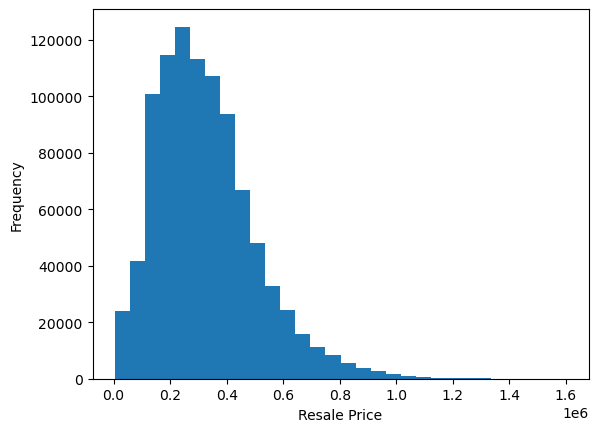

In [12]:
import matplotlib.pyplot as plt
plt.hist(combined_data_3['resale_price'], bins=30)
plt.xlabel('Resale Price')
plt.ylabel('Frequency')

#The houses are usually clustered around 500,000k.
#The price increases and the frequency decreases. 

Text(0, 0.5, 'Frequency')

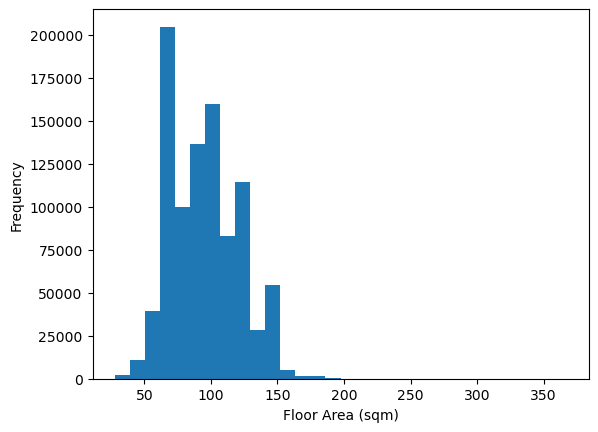

In [13]:
plt.hist(combined_data_3['floor_area_sqm'], bins=30)
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')

Logging the skewed variables

In [15]:
import numpy as np

combined_data_3['log_resale_price'] = np.log(combined_data_3['resale_price'])
combined_data_3['log_floor_area'] = np.log(combined_data_3['floor_area_sqm'])

combined_data_3.to_csv("/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/combined_data_3.csv", index=False)

Visualising the new columns (logged columns)

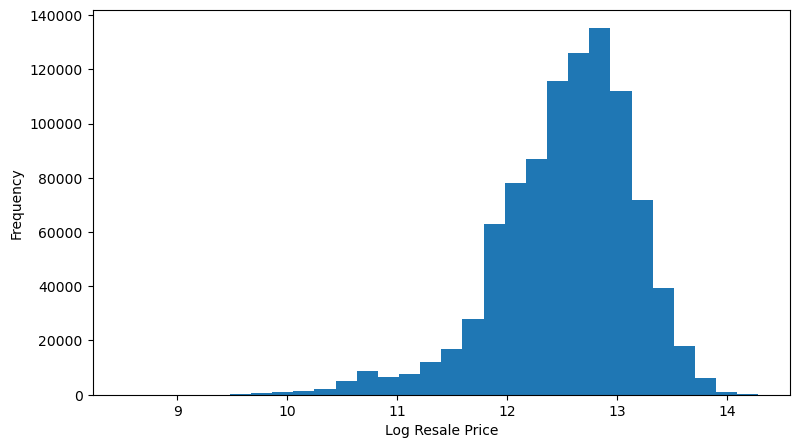

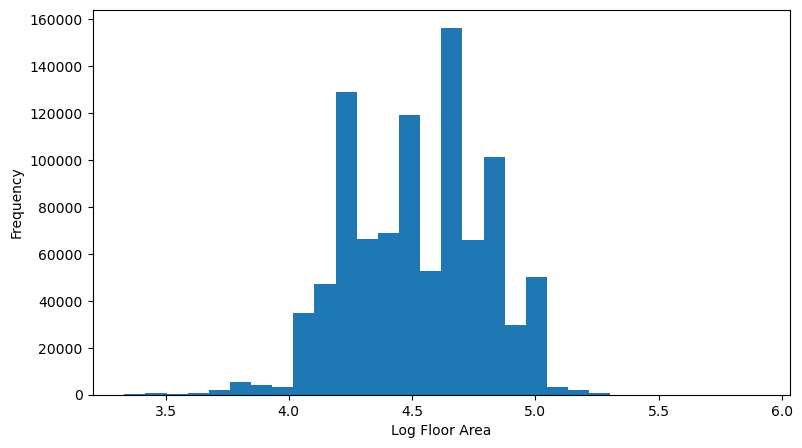

In [16]:
plt.figure(figsize=(9,5))
plt.hist(combined_data_3['log_resale_price'], bins=30, label='Log Resale Price')
plt.xlabel('Log Resale Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(9,5))
plt.hist(combined_data_3['log_floor_area'], bins=30, label='Log Floor Area')
plt.xlabel('Log Floor Area')
plt.ylabel('Frequency')
plt.show()

Multi-variate Analysis

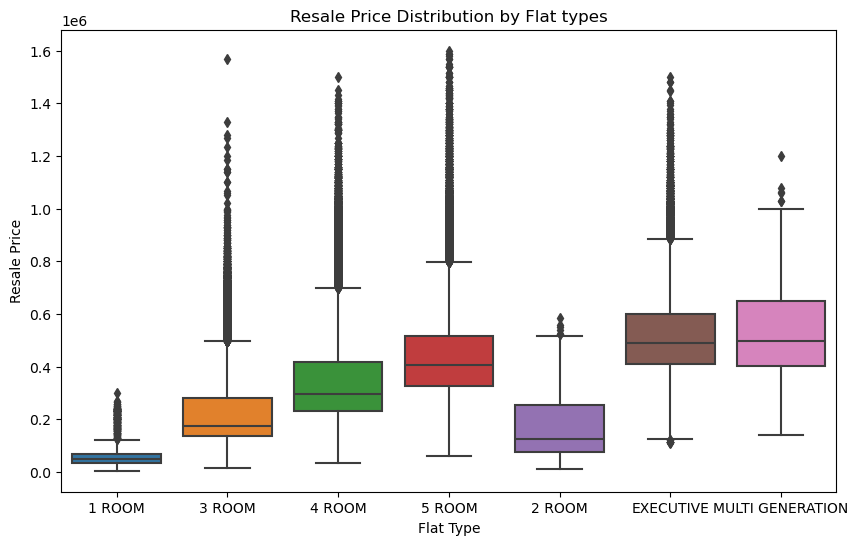

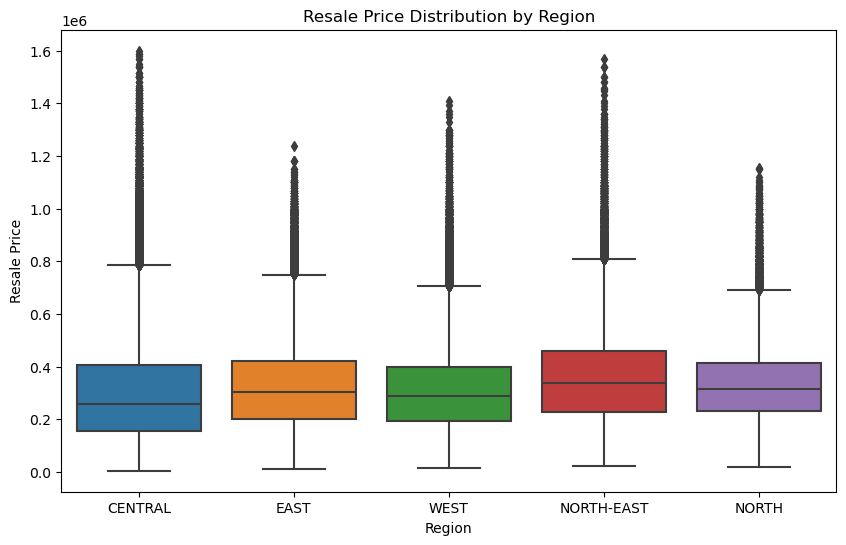

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
sns.boxplot(data=combined_data, x='flat_type', y='resale_price')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.title('Resale Price Distribution by Flat types')
plt.show()


plt.figure(figsize = (10,6))
sns.boxplot(data=combined_data, x='region', y='resale_price')
plt.xlabel('Region')
plt.ylabel('Resale Price')
plt.title('Resale Price Distribution by Region')
plt.show()

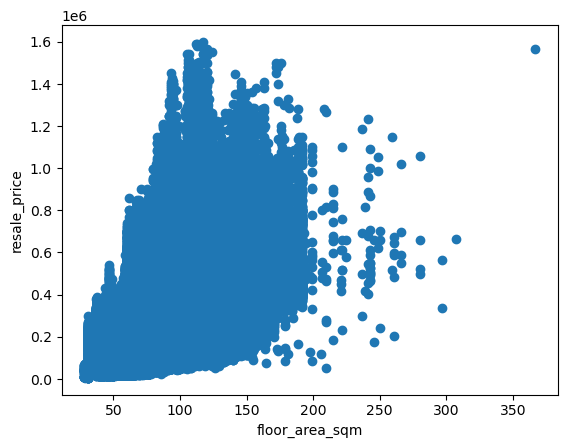

In [18]:
import matplotlib.pyplot as plt
plt.scatter(combined_data_3['floor_area_sqm'], combined_data_3['resale_price'])
plt.xlabel('floor_area_sqm')
plt.ylabel('resale_price')
plt.show()

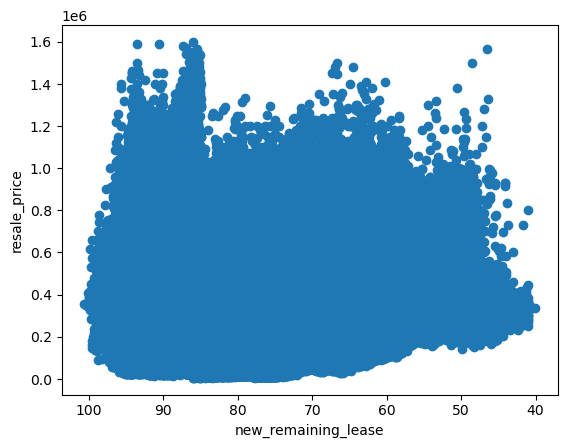

In [19]:
import matplotlib.pyplot as plt
plt.scatter(combined_data_3['new_remaining_lease'], combined_data_3['resale_price'])
plt.xlabel('new_remaining_lease')
plt.ylabel('resale_price')
plt.gca().invert_xaxis()
plt.show()

Plotting correlation matrix to see correlated columns

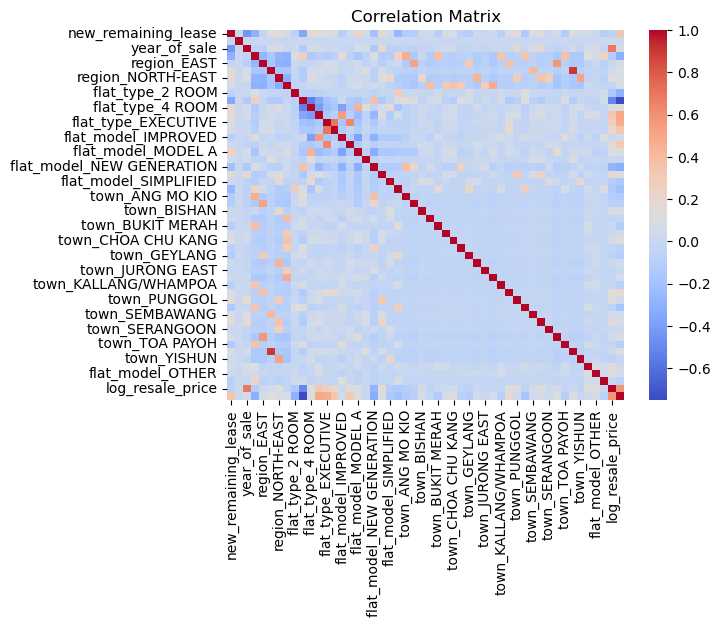

In [20]:
#creating dataframe with wanted columns

import seaborn as sns
import matplotlib.pyplot as plt 

temporary_data = combined_data_3.drop(columns=['flat_type_1 ROOM', 'flat_type_MULTI GENERATION', 'flat_model_2-ROOM', 'flat_model_3GEN', 
                                               'flat_model_ADJOINED FLAT', 'flat_model_DBSS', 'flat_model_IMPROVED-MAISONETTE', 
                                               'flat_model_MODEL A-MAISONETTE', 'flat_model_MULTI GENERATION', 
                                               'flat_model_PREMIUM APARTMENT LOFT', 'flat_model_PREMIUM MAISONETTE', 'flat_model_TERRACE', 'flat_model_TYPE S1', 
                                               'flat_model_TYPE S2', 'town_BUKIT TIMAH', 'town_CENTRAL AREA', 
                                               'town_LIM CHU KANG', 'town_MARINE PARADE','storey_range','clean_street_name','street_name','floor_area_sqm','resale_price',
                                               'month','block','lease_commence_date','remaining_lease','years_difference','months_difference', 'flat_type_OTHER'])

correlation_matrix = temporary_data.corr()

#creating a correlation matrix 
plt.figure(figure=(12,8))
sns.heatmap(correlation_matrix, cmap= 'coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [21]:
temporary_data.describe()

,new_remaining_lease,month_of_sale,year_of_sale,region_CENTRAL,region_EAST,region_NORTH,region_NORTH-EAST,region_WEST,flat_type_2 ROOM,flat_type_3 ROOM,...,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN,storey_range_binned_ABOVE 25,flat_model_OTHER,town_OTHER,log_resale_price,log_floor_area
count,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,...,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000,943504.000000
mean,80.486119,6.577263,2006.520055,0.210166,0.221802,0.086193,0.231781,0.250059,0.013045,0.317454,...,0.024460,0.086016,0.033925,0.070719,0.075388,0.016221,0.010013,0.019074,12.534702,4.524095
std,10.874321,3.413923,9.554894,0.407426,0.415459,0.280648,0.421970,0.433047,0.113467,0.465486,...,0.154472,0.280387,0.181035,0.256356,0.264017,0.126326,0.099561,0.136784,0.616217,0.276059
min,40.080000,1.000000,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.517193,3.332205
25%,73.500000,4.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.180755,4.290459
50%,82.330000,7.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.611538,4.532599
75%,89.420000,10.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.959844,4.727388
max,100.670000,12.000000,2025.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,14.285514,5.904544


Correlation matrix unable to see the correlation, show highly correlated pairs instead. 

In [22]:
correlation_matrix = temporary_data.corr()

for col1 in correlation_matrix.columns:
    for col2 in correlation_matrix.columns: 
        if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > 0.9:
            print(f"{col1} and {col2}: {correlation_matrix.loc[col1,col2]:.2f} ")

No output/results; No pairs of columns in dataset with correlation above 0.9, no strongly correlated columns (GOOD!)

Dropping dummies for with little 1s and many 0s; only 1% are 1s -> good for Linear regression/Logistic regression.

In [23]:
low_variance_cols = [col for col in temporary_data.columns if temporary_data[col].nunique() == 1 or temporary_data[col].mean()<0.01]

#col for col; Loops through each column name one at a time

print("Drop these dummy columns due to low variance:", low_variance_cols)

Drop these dummy columns due to low variance: []


In [24]:
temporary_data.to_csv("/Users/yoitsal/Library/Mobile Documents/com~apple~CloudDocs/Data Analytics Personal Project/ResaleFlatPrices/temporary_data.csv", index=False)